In [21]:
# 🧰 Imports
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
spark = SparkSession.builder \
    .appName("FIFA Visual Insights") \
    .getOrCreate()


In [23]:
df = spark.read.parquet("/Users/vidhyasagar/Projects/data/fifa_transformed.parquet")
df.printSchema()

root
 |-- sofifa_id: integer (nullable = true)
 |-- player_url: string (nullable = true)
 |-- short_name: string (nullable = true)
 |-- long_name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- dob: date (nullable = true)
 |-- height_cm: integer (nullable = true)
 |-- weight_kg: integer (nullable = true)
 |-- nationality: string (nullable = true)
 |-- club_name: string (nullable = true)
 |-- league_name: string (nullable = true)
 |-- league_rank: integer (nullable = true)
 |-- overall: integer (nullable = true)
 |-- potential: integer (nullable = true)
 |-- value_eur: integer (nullable = true)
 |-- wage_eur: integer (nullable = true)
 |-- player_positions: string (nullable = true)
 |-- preferred_foot: string (nullable = true)
 |-- international_reputation: integer (nullable = true)
 |-- weak_foot: integer (nullable = true)
 |-- skill_moves: integer (nullable = true)
 |-- work_rate: string (nullable = true)
 |-- body_type: string (nullable = true)
 |-- real_face: stri

In [24]:
pandas_df = df.select(
    "short_name", "Nationality", "Overall", "Potential", 
    "Age", "Wage_EUR", "Value_EUR", "is_top_player", "age_bucket"
).toPandas()

In [10]:
sns.set(style="whitegrid")

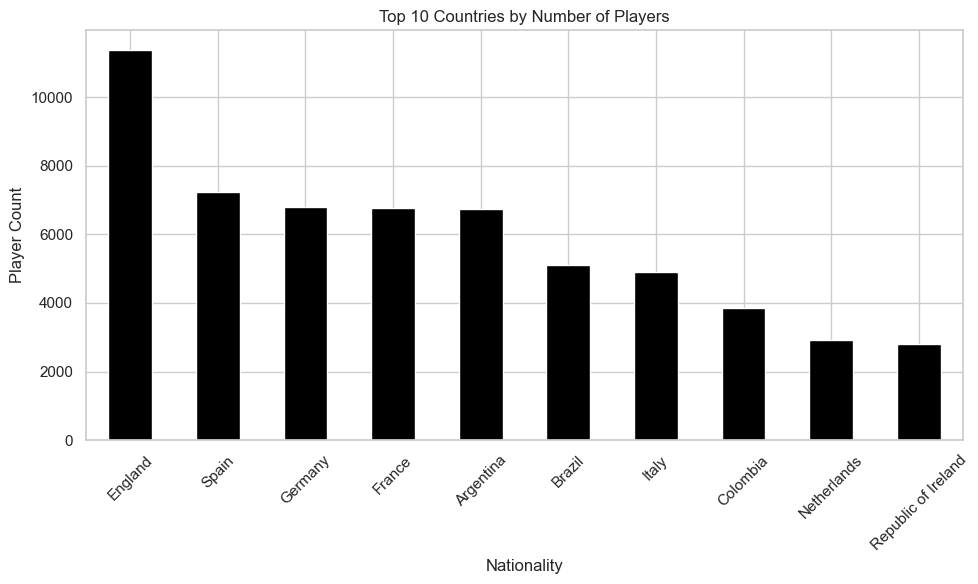

In [ ]:
# ## 1. 🔝 Top 10 Countries by Player Count

plt.figure(figsize=(10, 6))
top_countries = pandas_df["Nationality"].value_counts().head(10)
top_countries.plot(kind="bar", color="black")
plt.title("Top 10 Countries by Number of Players")
plt.ylabel("Player Count")
plt.xlabel("Nationality")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/2j/c_tqll_92rv2fgn7368m757c0000gn/T/ipykernel_9059/163462506.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pandas_df, x="age_bucket", y="Overall", estimator='mean', palette="viridis")


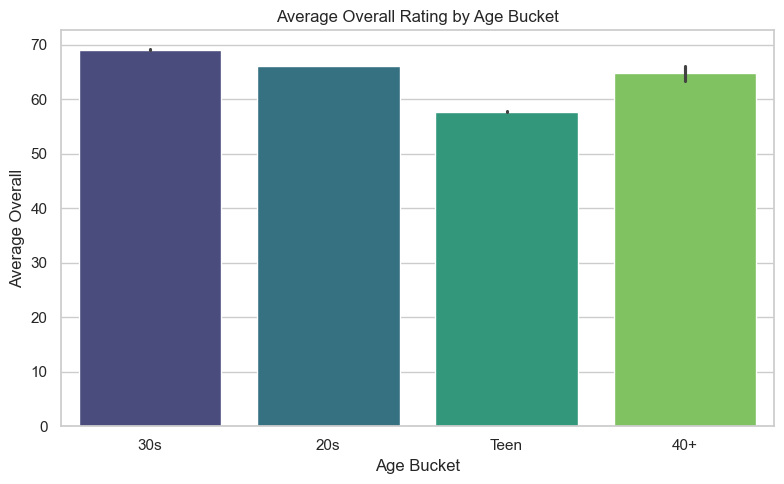

In [13]:
# ## 2. 📈 Average Rating by Age Bucket

plt.figure(figsize=(8, 5))
sns.barplot(data=pandas_df, x="age_bucket", y="Overall", estimator='mean', palette="viridis")
plt.title("Average Overall Rating by Age Bucket")
plt.ylabel("Average Overall")
plt.xlabel("Age Bucket")
plt.tight_layout()
plt.show()


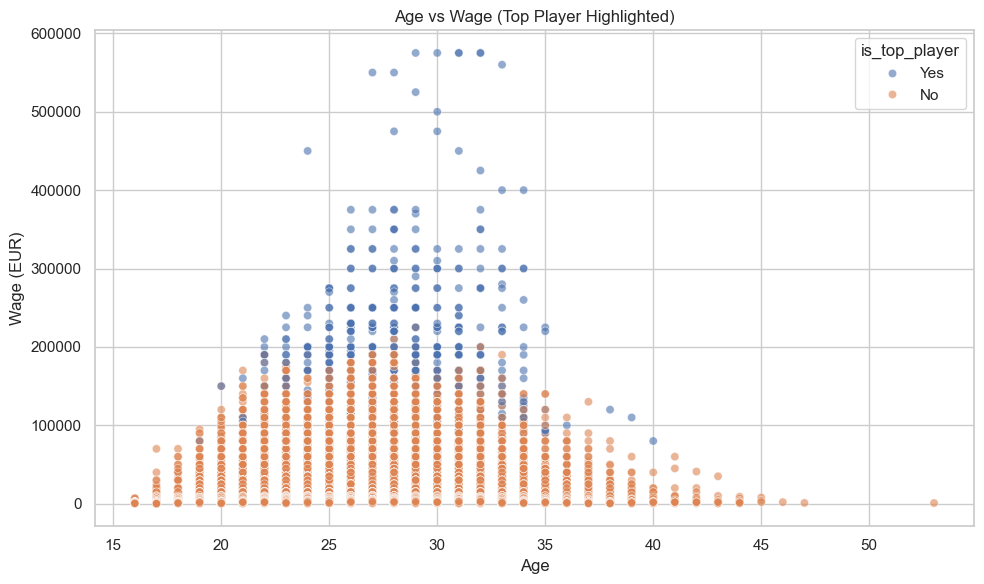

In [14]:
# ## 3. 🎯 Age vs Wage Scatter Plot (Top Players Highlighted)

# %% [code]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pandas_df, x="Age", y="Wage_EUR", hue="is_top_player", alpha=0.6)
plt.title("Age vs Wage (Top Player Highlighted)")
plt.ylabel("Wage (EUR)")
plt.xlabel("Age")
plt.tight_layout()
plt.show()


/var/folders/2j/c_tqll_92rv2fgn7368m757c0000gn/T/ipykernel_9059/1967368267.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_value, x="short_name", y="Value_EUR", palette="rocket")


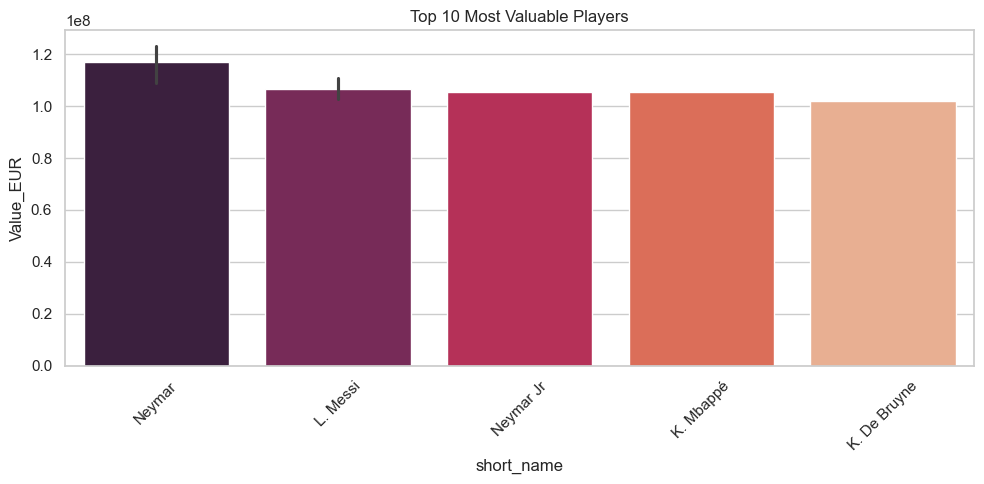

In [15]:
# ## 4. 💰 Top 10 Most Valuable Players

top_value = pandas_df.sort_values("Value_EUR", ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(data=top_value, x="short_name", y="Value_EUR", palette="rocket")
plt.title("Top 10 Most Valuable Players")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
spark.stop()